# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [10]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [11]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [12]:
# Adicionando o logaritmo de net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustando o modelo com logaritmo de net_bill
model_log_net_bill = smf.ols(formula='tip_pct ~ log_net_bill', data=tips).fit()

# Resumo do novo modelo
print(model_log_net_bill.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.62e-13
Time:                        20:48:49   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [13]:
# Ajustando o modelo com um polinômio de segundo grau em net_bill
model_poly_net_bill = smf.ols(formula='tip_pct ~ net_bill + np.power(net_bill, 2)', data=tips).fit()

# Resumo do modelo
print(model_poly_net_bill.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.06e-09
Time:                        20:48:52   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [14]:
# Ajustando o modelo no log do tip_pct em função de net_bill
model_log_tip_pct = smf.ols(formula='np.log(tip_pct) ~ net_bill', data=tips).fit()

# Resumo do modelo
print(model_log_tip_pct.summary())

# Calculando R^2 em termos de tip_pct
tip_pct_predicted = np.exp(model_log_tip_pct.predict())
tip_pct_actual = tips['tip_pct']

# Calculando R^2
r_squared = 1 - np.sum((tip_pct_actual - tip_pct_predicted)**2) / np.sum((tip_pct_actual - np.mean(tip_pct_actual))**2)
print(f'\nCoeficiente de Determinação (R^2): {r_squared}')

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           8.27e-16
Time:                        20:48:54   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [15]:
# Ajustando o modelo no log do tip_pct em função do log de net_bill
model_log_log = smf.ols(formula='np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()

# Resumo do modelo
print(model_log_log.summary())

# Calculando R^2 em termos de tip_pct
tip_pct_predicted = np.exp(model_log_log.predict())
tip_pct_actual = tips['tip_pct']

# Calculando R^2
r_squared = 1 - np.sum((tip_pct_actual - tip_pct_predicted)**2) / np.sum((tip_pct_actual - np.mean(tip_pct_actual))**2)
print(f'\nCoeficiente de Determinação (R^2): {r_squared}')

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           5.20e-20
Time:                        20:48:57   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

###  6. qual modelo resultou no melhor ajuste?

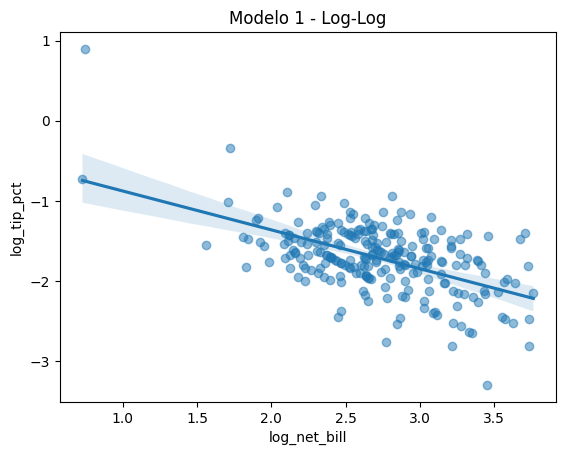

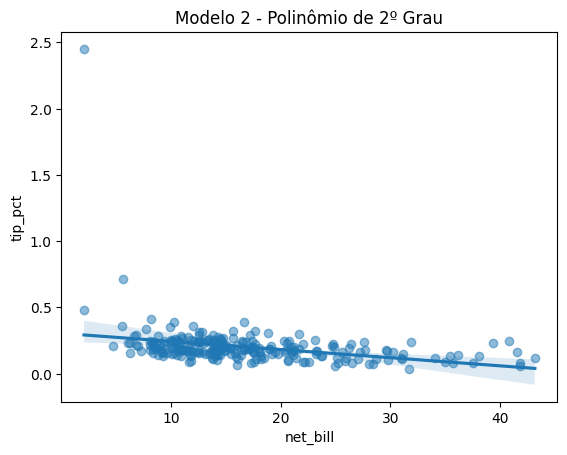

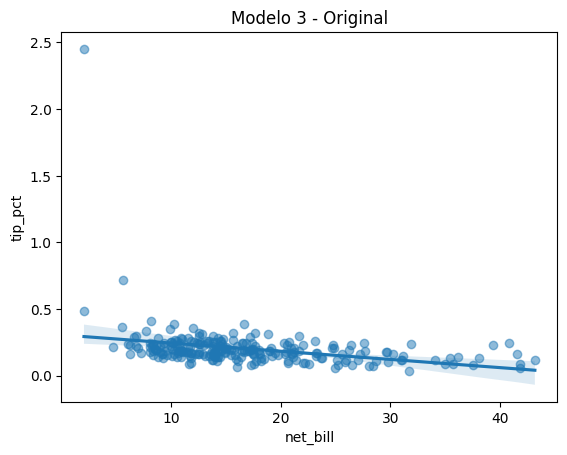

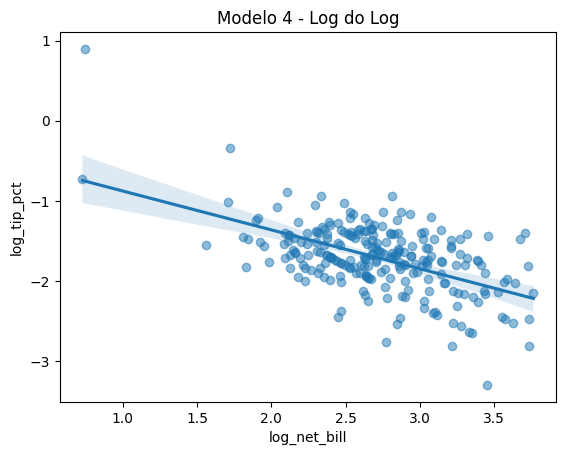

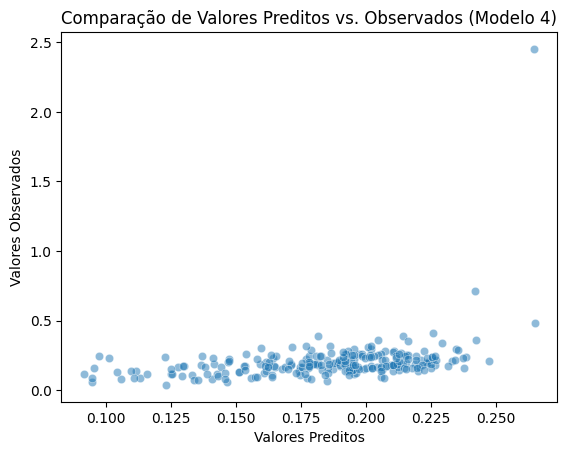

In [18]:
# Ajustando o modelo de tip_pct em função do net_bill (Modelo Original)
model_original = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Corrigindo o nome das colunas no dataframe
tips['log_tip_pct'] = np.log(tips['tip_pct'])
tips['log_net_bill'] = np.log(tips['net_bill'])

# Função para plotar a regressão e a dispersão dos dados
def plot_regression(model, data, x, y, title):
    sns.regplot(x=x, y=y, data=data, scatter_kws={'alpha':0.5})
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Plotando para o Modelo 1 (Log-Log)
plot_regression(model_log_log, tips, 'log_net_bill', 'log_tip_pct', 'Modelo 1 - Log-Log')

# Plotando para o Modelo 2 (Polinômio de 2º Grau)
plot_regression(model_poly_net_bill, tips, 'net_bill', 'tip_pct', 'Modelo 2 - Polinômio de 2º Grau')

# Plotando para o Modelo 3 (Original)
plot_regression(model_original, tips, 'net_bill', 'tip_pct', 'Modelo 3 - Original')

# Plotando para o Modelo 4 (Log do Log)
plot_regression(model_log_tip_pct, tips, 'log_net_bill', 'log_tip_pct', 'Modelo 4 - Log do Log')

# Adicional: Comparação dos valores preditos vs. observados para o Modelo 4
sns.scatterplot(x=np.exp(model_log_tip_pct.predict()), y=tips['tip_pct'], alpha=0.5)
plt.title('Comparação de Valores Preditos vs. Observados (Modelo 4)')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Observados')
plt.show()




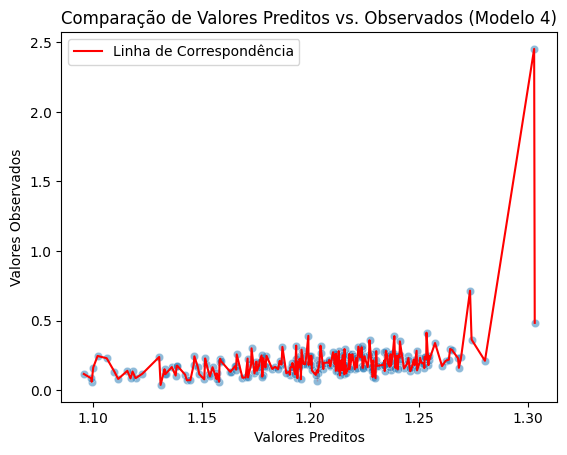

In [20]:
# Obtendo as previsões do Modelo 4
predictions = np.exp(np.exp(model_log_tip_pct.predict()))

# Criando um DataFrame com os valores observados e preditos
comparison_data = pd.DataFrame({'Observados': tips['tip_pct'], 'Preditos': predictions})

# Criando o gráfico de dispersão com a linha diagonal
sns.scatterplot(x='Preditos', y='Observados', data=comparison_data, alpha=0.5)
sns.lineplot(x='Preditos', y='Observados', data=comparison_data, color='red', label='Linha de Correspondência')
plt.title('Comparação de Valores Preditos vs. Observados (Modelo 4)')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Observados')
plt.legend()
plt.show()


## Ao comparar os modelos com base nos resultados apresentados, podemos considerar o coeficiente de determinação (R^2) como uma métrica chave para avaliar o ajuste do modelo aos dados. Vamos resumir os resultados dos quatro modelos:

### 1.  Modelo 1 (log-linear):
r^2=0.202
### 2.  Modelo 2 (polinômio de segundo grau):
r^2=0.158
### 3. Modelo 3 (log-linear com np.log(tip_pct))
r^2=0.0868
### 4. Modelo 4 (Modelo 4 np.log(tip_pct) e np.log(net_bill))
r^2=0.2277

 Em geral, um R2 mais próximo de 1 indica um melhor ajuste do modelo aos dados. Portanto, entre os quatro modelos, o Modelo 4 tem o maior R2, indicando que ele explica uma maior proporção da variação na variável de resposta (tip_pct) em comparação aos outros modelos.

### Resposta :
**Assim, com base na métrica R2, o Modelo 4 parece ser o que apresenta o melhor ajuste para os dados fornecidos.**


